In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Classification (KNN)**

In [1]:
# 🔹 IRIS - CLASSIFICATION USING KNN

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split data
X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("✅ KNN Classification Accuracy:", accuracy_score(y_test, y_pred))


✅ KNN Classification Accuracy: 0.9777777777777777


**IRIS (Linear regression)**

In [2]:
# 🔹 IRIS - REGRESSION USING LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature & target for regression
X_reg = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_reg = df['sepal length (cm)']

# Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)

# Train model
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_reg = reg.predict(X_test_r)

# MSE
print("✅ Linear Regression MSE:", mean_squared_error(y_test_r, y_pred_reg))


✅ Linear Regression MSE: 0.11662648994036189


**Clustering (KMeans)**

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


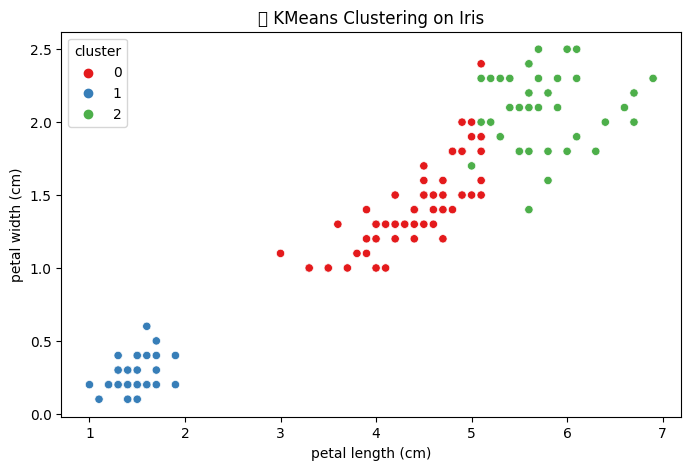

In [3]:
# 🔹 IRIS - CLUSTERING USING KMEANS

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[iris.feature_names])

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster', palette='Set1')
plt.title("✅ KMeans Clustering on Iris")
plt.show()


**Correlation HeatMap**

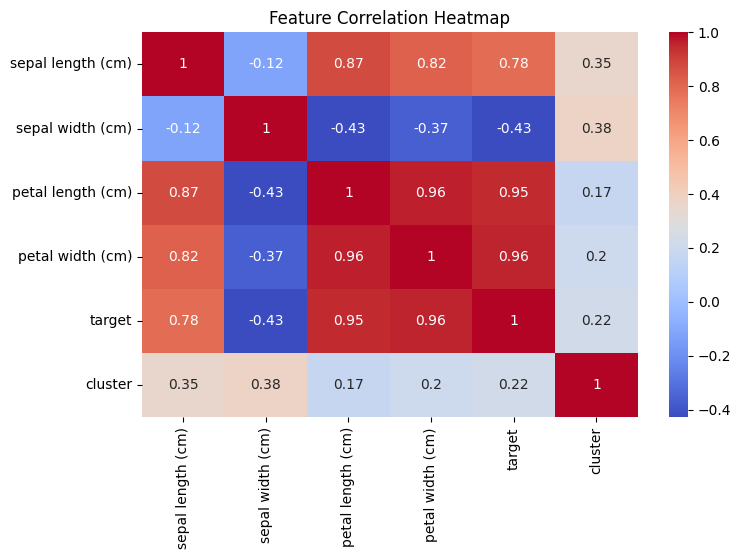

In [4]:
# 🔹 CORRELATION HEATMAP

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Classification Report**

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Confusion Metrix**

<Axes: >

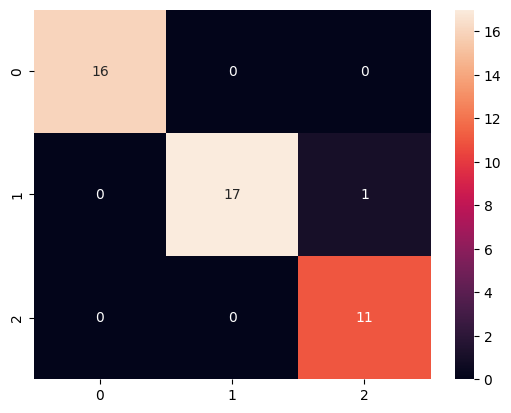

In [9]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


**Regression: R2 score**

In [10]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test_r, y_pred_reg))


R² Score: 0.7539294801520872
